In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Centralised Performance

## Validation Metrics

In [2]:
root = os.path.join(os.getcwd(), 'experiments')
mnist_val = pd.read_csv(os.path.join(root, 'MNIST', 'centralised_test', 'validation_results.csv'))
fmnist_val = pd.read_csv(os.path.join(root, 'FMNIST', 'centralised_test', 'validation_results.csv'))
cifar10_val = pd.read_csv(os.path.join(root, 'CIFAR10', 'centralised_test', 'validation_results.csv'))
pathmnist_val = pd.read_csv(os.path.join(root, 'PATHMNIST', 'centralised_test', 'validation_results.csv'))
bloodmnist_val = pd.read_csv(os.path.join(root, 'BLOODMNIST', 'centralised_test', 'validation_results.csv'))

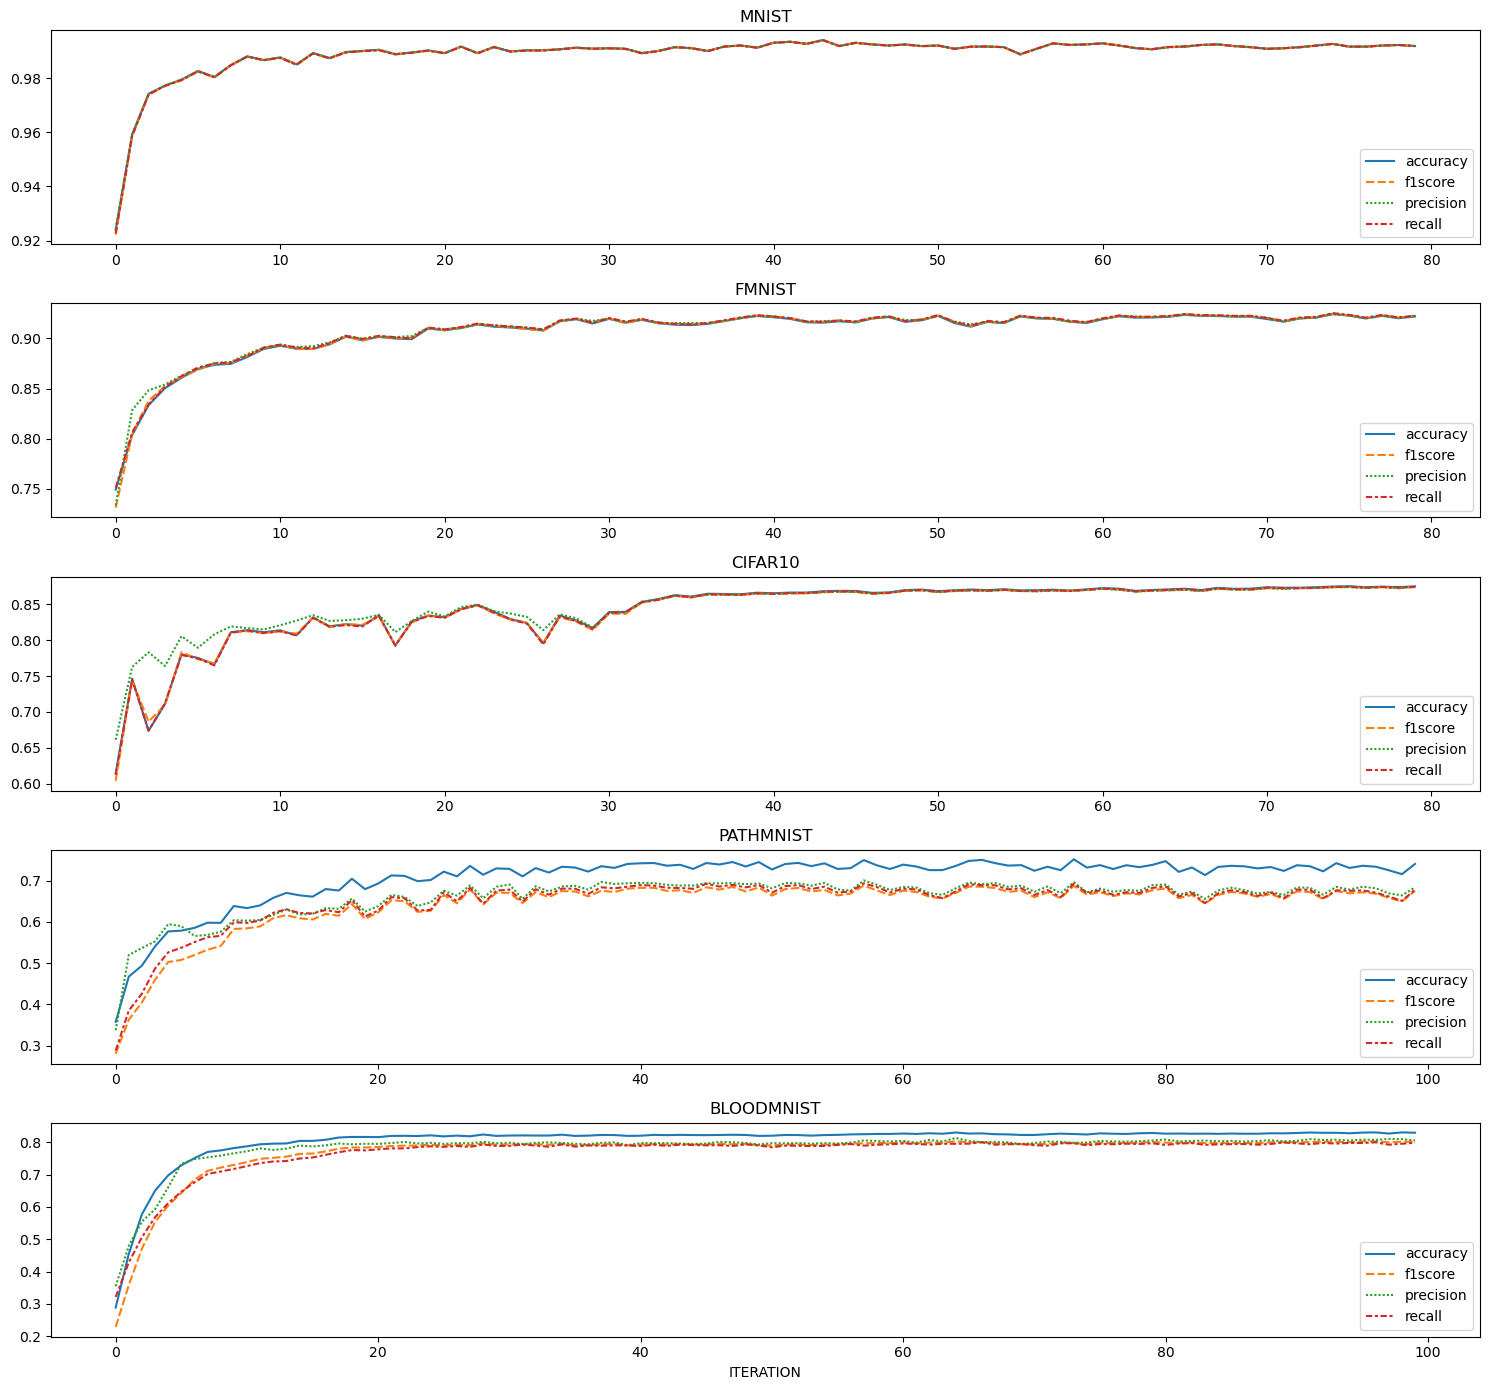

In [3]:
names = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST', 'BLOODMNIST']
# Defines a figure
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 14))

# Sets x label
ax[-1].set_xlabel('ITERATION')


for ax_i, dataset in zip(ax, names):
    ax_i.set_title(dataset)

sns.lineplot(mnist_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[0])
sns.lineplot(fmnist_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[1])
sns.lineplot(cifar10_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[2])
sns.lineplot(pathmnist_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[3])
sns.lineplot(bloodmnist_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[4])

fig.tight_layout()

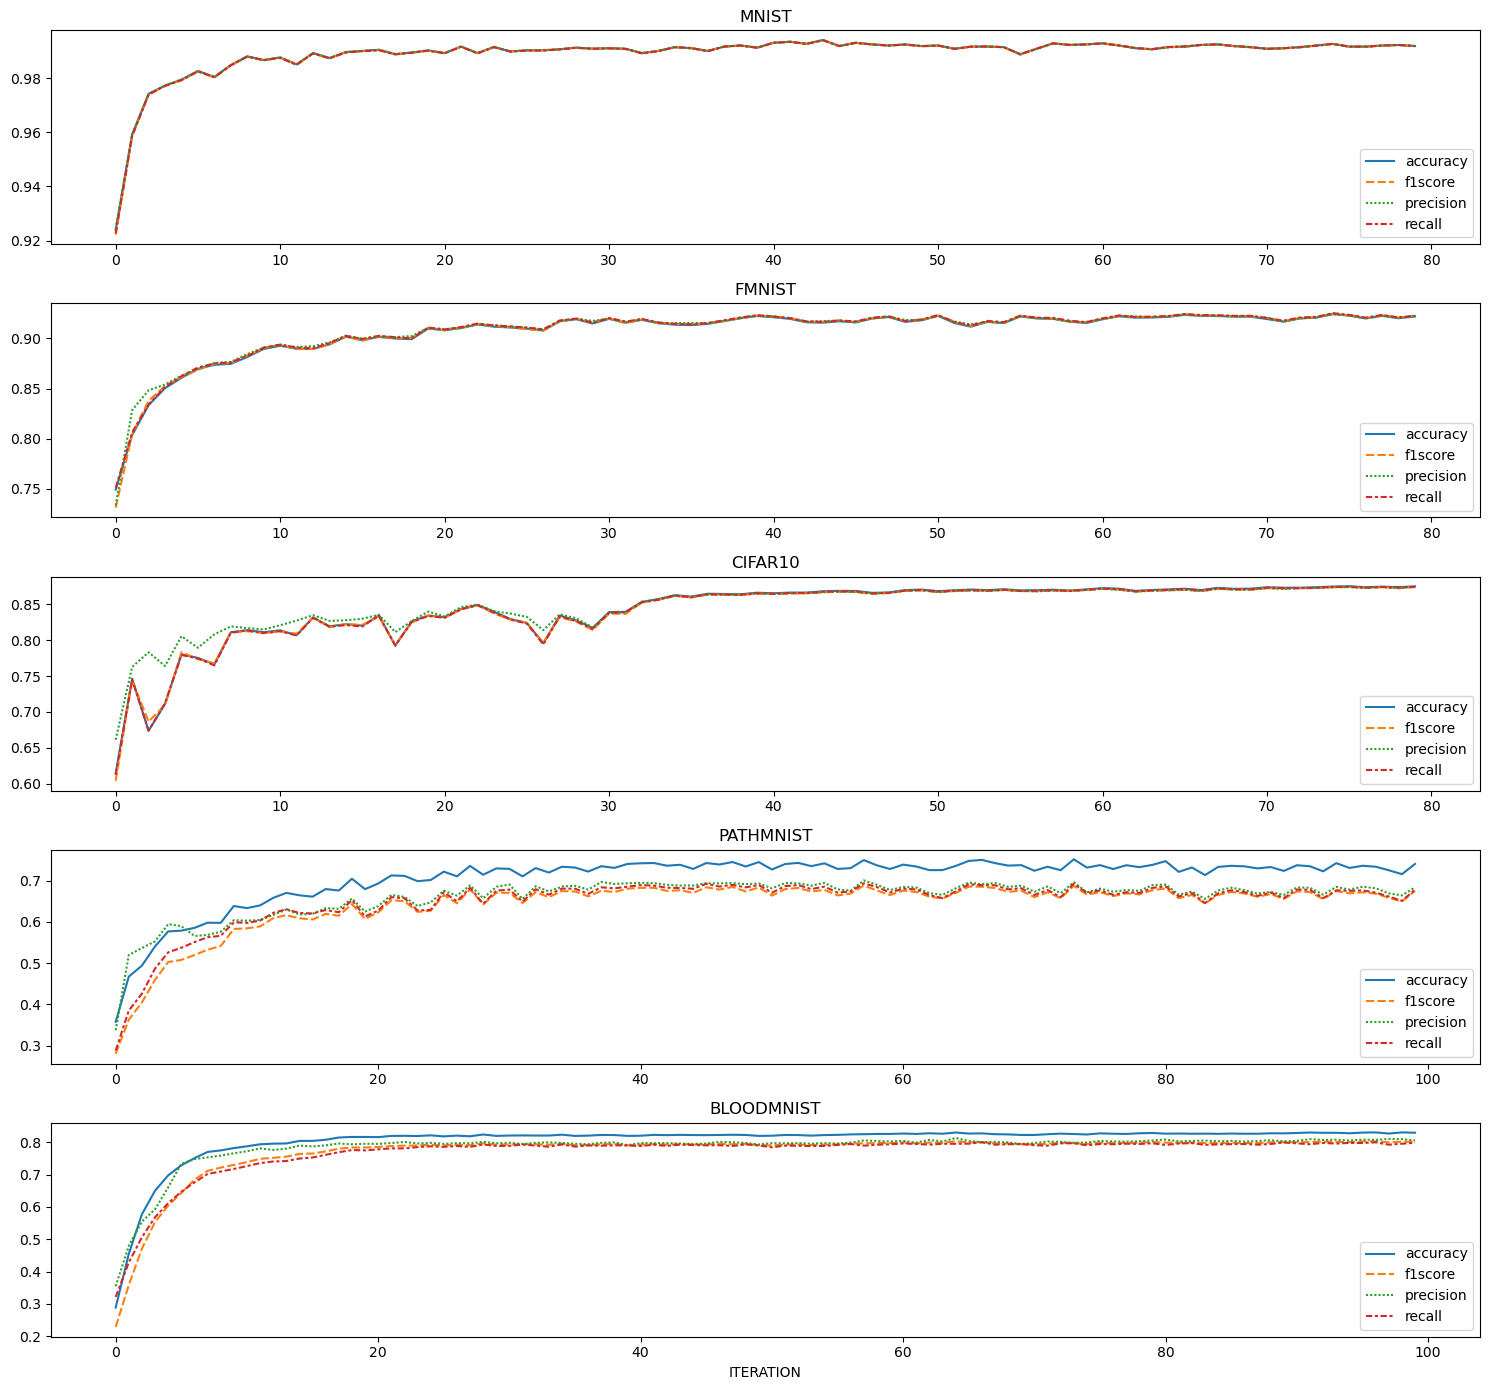

In [4]:
names = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST', 'BLOODMNIST']
# Defines a figure
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 14))

# Sets x label
ax[-1].set_xlabel('ITERATION')


for ax_i, dataset in zip(ax, names):
    ax_i.set_title(dataset)

sns.lineplot(mnist_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[0])
sns.lineplot(fmnist_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[1])
sns.lineplot(cifar10_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[2])
sns.lineplot(pathmnist_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[3])
sns.lineplot(bloodmnist_val[['accuracy', 'f1score', 'precision', 'recall']], ax=ax[4])

fig.tight_layout()

## Train vs. Validation Loss

In [5]:
root = os.path.join(os.getcwd(), 'experiments')
mnist_train = pd.read_csv(os.path.join(root, 'MNIST', 'centralised_test', 'training_loss.csv'), index_col=0)
fmnist_train = pd.read_csv(os.path.join(root, 'FMNIST', 'centralised_test', 'training_loss.csv'), index_col=0)
cifar10_train = pd.read_csv(os.path.join(root, 'CIFAR10', 'centralised_test', 'training_loss.csv'), index_col=0)
pathmnist_train = pd.read_csv(os.path.join(root, 'PATHMNIST', 'centralised_test', 'training_loss.csv'), index_col=0)
bloodmnist_train = pd.read_csv(os.path.join(root, 'BLOODMNIST', 'centralised_test', 'training_loss.csv'), index_col=0)

In [6]:
mnist_losses = pd.DataFrame(index=range(80), columns=['Training Loss', 'Validation Loss'])
mnist_losses['Training Loss'] = mnist_train['loss']
mnist_losses['Validation Loss'] = mnist_val['test_loss']

fmnist_losses = pd.DataFrame(index=range(80), columns=['Training Loss', 'Validation Loss'])
fmnist_losses['Training Loss'] = fmnist_train['loss']
fmnist_losses['Validation Loss'] = fmnist_val['test_loss']

cifar10_losses = pd.DataFrame(index=range(80), columns=['Training Loss', 'Validation Loss'])
cifar10_losses['Training Loss'] = cifar10_train['loss']
cifar10_losses['Validation Loss'] = cifar10_val['test_loss']

pathmnist_losses = pd.DataFrame(index=range(100), columns=['Training Loss', 'Validation Loss'])
pathmnist_losses['Training Loss'] = pathmnist_train['loss']
pathmnist_losses['Validation Loss'] = pathmnist_val['test_loss']

bloodmnist_losses = pd.DataFrame(index=range(100), columns=['Training Loss', 'Validation Loss'])
bloodmnist_losses['Training Loss'] = bloodmnist_train['loss']
bloodmnist_losses['Validation Loss'] = bloodmnist_val['test_loss']

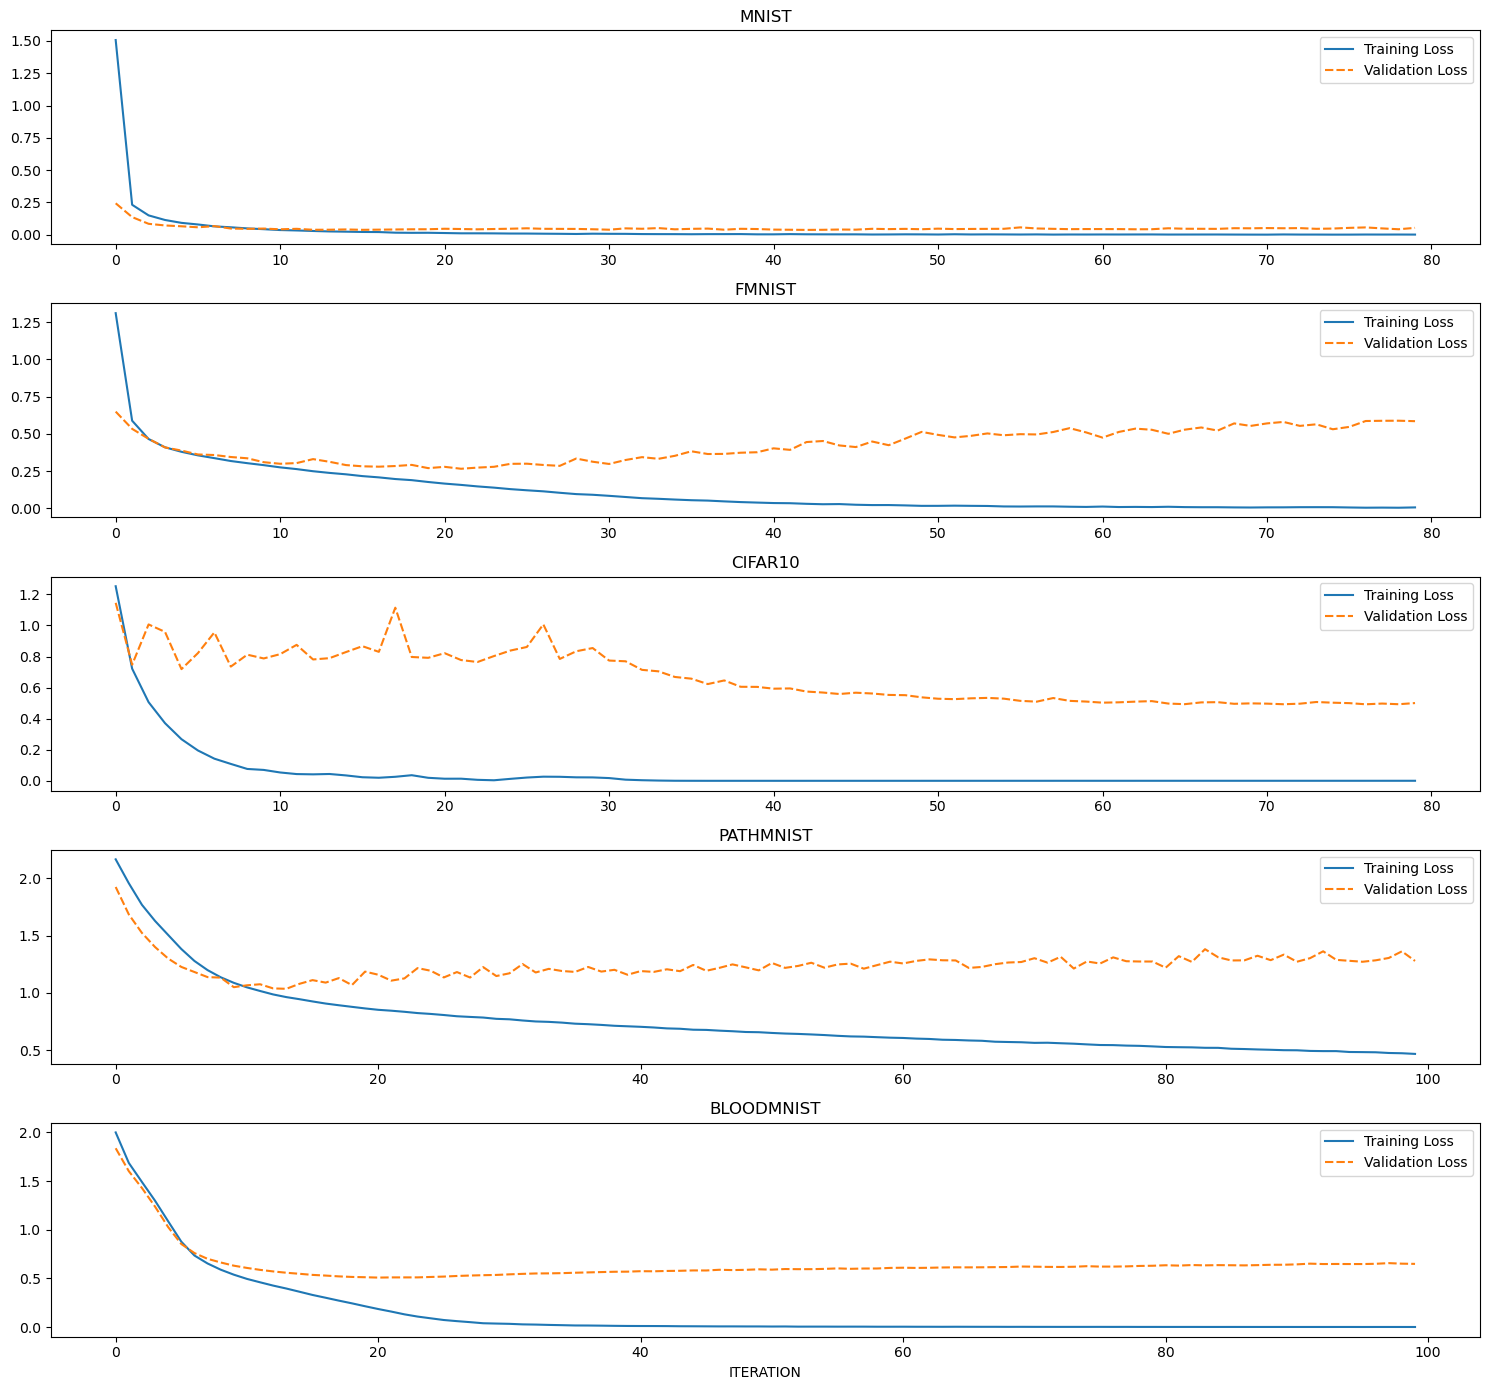

In [7]:
names = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST', 'BLOODMNIST']
# Defines a figure
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 14))

# Sets x label
ax[-1].set_xlabel('ITERATION')

for ax_i, dataset in zip(ax, names):
    ax_i.set_title(dataset)

sns.lineplot(mnist_losses, ax=ax[0])
sns.lineplot(fmnist_losses, ax=ax[1])
sns.lineplot(cifar10_losses, ax=ax[2])
sns.lineplot(pathmnist_losses, ax=ax[3])
sns.lineplot(bloodmnist_losses, ax=ax[4])

fig.tight_layout()

## Gradients and Weights Norm

In [8]:
train_results = [mnist_train, fmnist_train, cifar10_train, pathmnist_train, bloodmnist_train]
#train_results = [mnist_train, fmnist_train, cifar10_train, pathmnist_train]
for dataset in train_results:
    dataset['eps1_gradients'] = dataset['gradients_norm'] / 10
    dataset['eps2_gradients'] = 5 * dataset['eps1_gradients']
    dataset['eps1_weights'] = dataset['weights_norm'] / 10
    dataset['eps2_weights'] = 5 * dataset['eps1_weights']

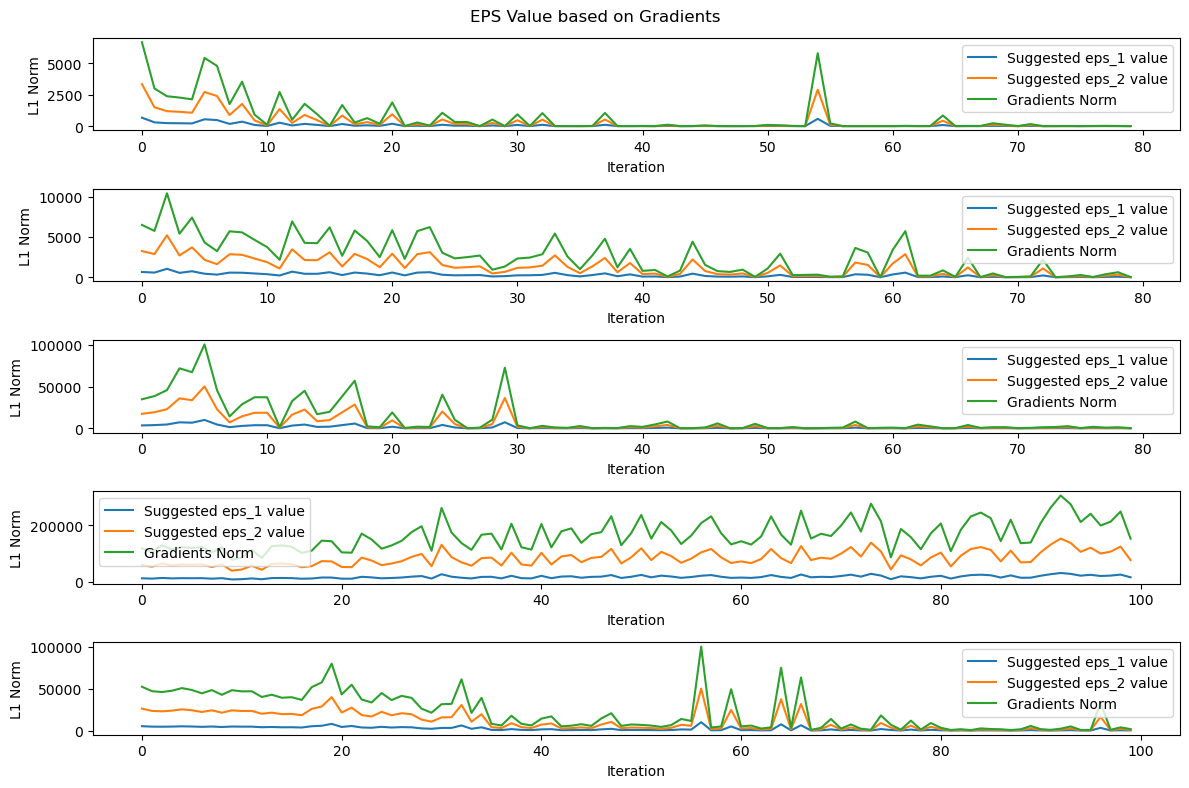

In [9]:
fig, axes = plt.subplots(5, 1, figsize=(12, 8))

for ax, dataset in zip(axes, train_results):
    sns.lineplot(dataset['eps1_gradients'], ax=ax, label='Suggested eps_1 value')
    sns.lineplot(dataset['eps2_gradients'], ax=ax, label='Suggested eps_2 value')
    sns.lineplot(dataset['gradients_norm'], ax=ax, label='Gradients Norm')
    ax.set_ylabel("L1 Norm")
    ax.set_xlabel("Iteration")
    
fig.suptitle("EPS Value based on Gradients")
fig.tight_layout()

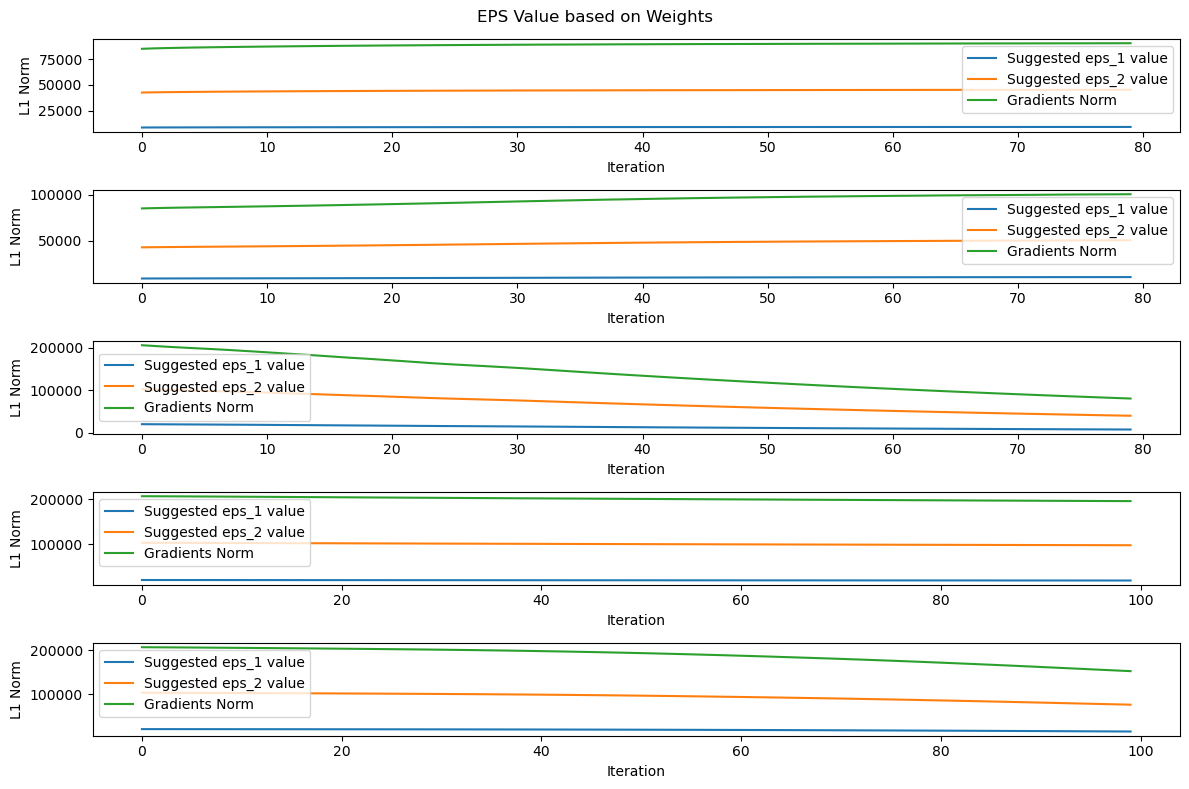

In [10]:
fig, axes = plt.subplots(5, 1, figsize=(12, 8))

for ax, dataset in zip(axes, train_results):
    sns.lineplot(dataset['eps1_weights'], ax=ax, label='Suggested eps_1 value')
    sns.lineplot(dataset['eps2_weights'], ax=ax, label='Suggested eps_2 value')
    sns.lineplot(dataset['weights_norm'], ax=ax, label='Gradients Norm')
    ax.set_ylabel("L1 Norm")
    ax.set_xlabel("Iteration")
    
fig.suptitle("EPS Value based on Weights")
fig.tight_layout()

## Rolling Norm

In [11]:
root = os.path.join(os.getcwd(), 'experiments')
mnist_train = pd.read_csv(os.path.join(root, 'MNIST', 'centralised_test', 'training_loss.csv'), index_col=0)
fmnist_train = pd.read_csv(os.path.join(root, 'FMNIST', 'centralised_test', 'training_loss.csv'), index_col=0)
cifar10_train = pd.read_csv(os.path.join(root, 'CIFAR10', 'centralised_test', 'training_loss.csv'), index_col=0)
pathmnist_train = pd.read_csv(os.path.join(root, 'PATHMNIST', 'centralised_test', 'training_loss.csv'), index_col=0)
bloodmnist_train = pd.read_csv(os.path.join(root, 'BLOODMNIST', 'centralised_test', 'training_loss.csv'), index_col=0)

In [12]:
mnist_losses = pd.DataFrame(index=range(80), columns=['Training Loss', 'Validation Loss'])
mnist_losses['Training Loss'] = mnist_train['loss']
mnist_losses['Validation Loss'] = mnist_val['test_loss']

fmnist_losses = pd.DataFrame(index=range(80), columns=['Training Loss', 'Validation Loss'])
fmnist_losses['Training Loss'] = fmnist_train['loss']
fmnist_losses['Validation Loss'] = fmnist_val['test_loss']

cifar10_losses = pd.DataFrame(index=range(80), columns=['Training Loss', 'Validation Loss'])
cifar10_losses['Training Loss'] = cifar10_train['loss']
cifar10_losses['Validation Loss'] = cifar10_val['test_loss']

pathmnist_losses = pd.DataFrame(index=range(100), columns=['Training Loss', 'Validation Loss'])
pathmnist_losses['Training Loss'] = pathmnist_train['loss']
pathmnist_losses['Validation Loss'] = pathmnist_val['test_loss']

tissuemnist_losses = pd.DataFrame(index=range(100), columns=['Training Loss', 'Validation Loss'])
bloodmnist_losses['Training Loss'] = bloodmnist_train['loss']
bloodmnist_losses['Validation Loss'] = bloodmnist_val['test_loss']

In [13]:
train_results = [mnist_train, fmnist_train, cifar10_train, pathmnist_train, bloodmnist_train]
for dataset in train_results:
    dataset['weights_rolling_norm'] = dataset.weights_norm.diff().abs().iloc[1:]
    dataset['eps1_rolling'] = dataset['weights_rolling_norm'] / 10
    dataset['eps2_rolling'] = 5 * dataset['eps1_rolling']

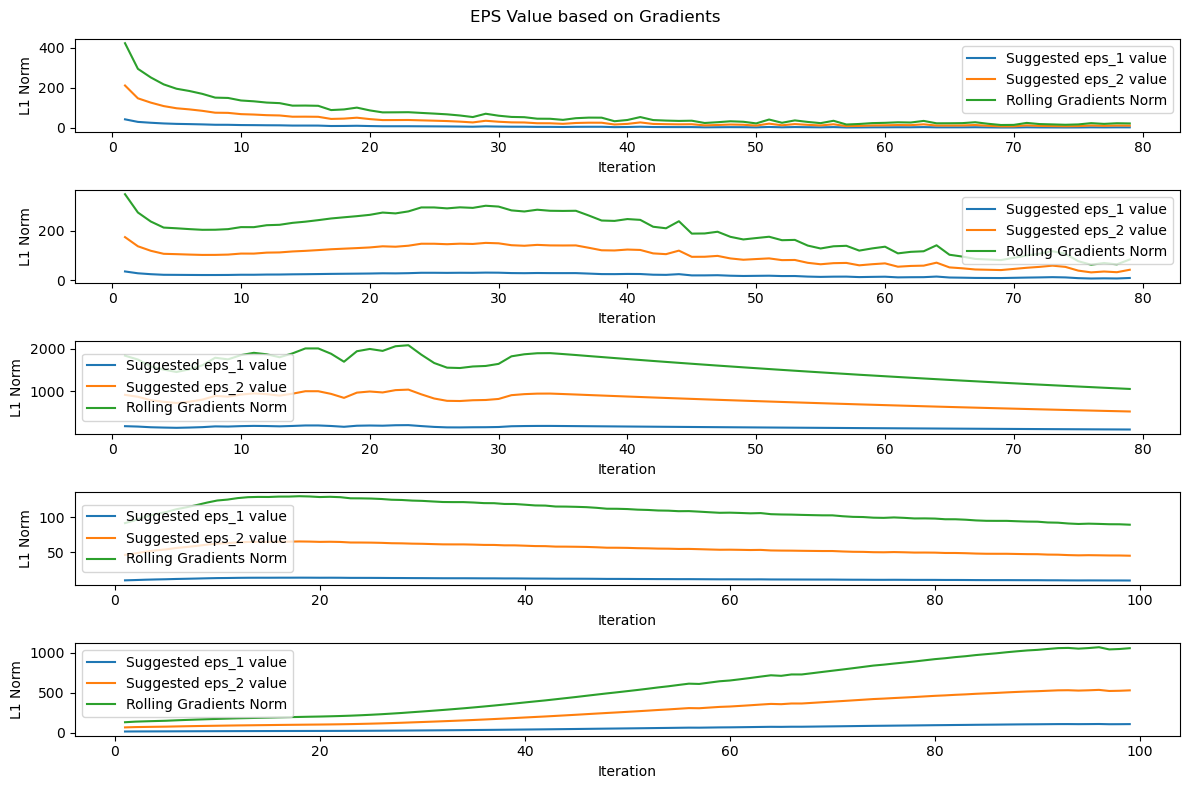

In [14]:
fig, axes = plt.subplots(5, 1, figsize=(12, 8))

for ax, dataset in zip(axes, train_results):
    sns.lineplot(dataset['eps1_rolling'], ax=ax, label='Suggested eps_1 value')
    sns.lineplot(dataset['eps2_rolling'], ax=ax, label='Suggested eps_2 value')
    sns.lineplot(dataset['weights_rolling_norm'], ax=ax, label='Rolling Gradients Norm')
    ax.set_ylabel("L1 Norm")
    ax.set_xlabel("Iteration")
    
fig.suptitle("EPS Value based on Gradients")
fig.tight_layout()

In [15]:
print(f"MNIST: \n {train_results[0].iloc[30]} \n")
print(f"FMNIST: \n {train_results[1].iloc[40]} \n")
print(f"CIFAR10: \n {train_results[2].iloc[10]} \n")
print(f"PATHMNIST: \n {train_results[3].iloc[40]} \n")
print(f"BLOODMNIST \n {train_results[4].iloc[40]} \n")

MNIST: 
 loss                        0.007283
gradients_norm            935.739624
weights_norm            89242.312500
weights_rolling_norm       60.593750
eps1_rolling                6.059375
eps2_rolling               30.296875
Name: 30, dtype: float64 

FMNIST: 
 loss                        0.035594
gradients_norm            789.421570
weights_norm            95538.523438
weights_rolling_norm      248.062500
eps1_rolling               24.806250
eps2_rolling              124.031250
Name: 40, dtype: float64 

CIFAR10: 
 loss                         0.053934
gradients_norm           37230.640625
weights_norm            189088.281250
weights_rolling_norm      1851.171875
eps1_rolling               185.117188
eps2_rolling               925.585938
Name: 10, dtype: float64 

PATHMNIST: 
 loss                         0.704925
gradients_norm          204090.000000
weights_norm            202322.453125
weights_rolling_norm       118.390625
eps1_rolling                11.839063
eps2_rolling  

## Explanation Quality

In [16]:
MNIST_EXPLANATIONS = pd.read_csv(os.path.join(root, 'MNIST', 'centralised_test', 'explanations', 'MNIST_explanations.csv'))
FMNIST_EXPLANATIONS = pd.read_csv(os.path.join(root, 'FMNIST', 'centralised_test', 'explanations', 'FMNIST_explanations.csv'))
CIFAR10_EXPLANATIONS = pd.read_csv(os.path.join(root, 'CIFAR10', 'centralised_test', 'explanations', 'CIFAR10_explanations.csv'))
PATHMNIST_EXPLANATIONS = pd.read_csv(os.path.join(root, 'PATHMNIST', 'centralised_test', 'explanations', 'PATHMNIST_explanations.csv'))
BLOODMNIST_EXPLANATIONS= pd.read_csv(os.path.join(root, 'BLOODMNIST', 'centralised_test', 'explanations', 'BLOODMNIST_explanations.csv'))
datasets = [MNIST_EXPLANATIONS, FMNIST_EXPLANATIONS, CIFAR10_EXPLANATIONS, PATHMNIST_EXPLANATIONS, BLOODMNIST_EXPLANATIONS]

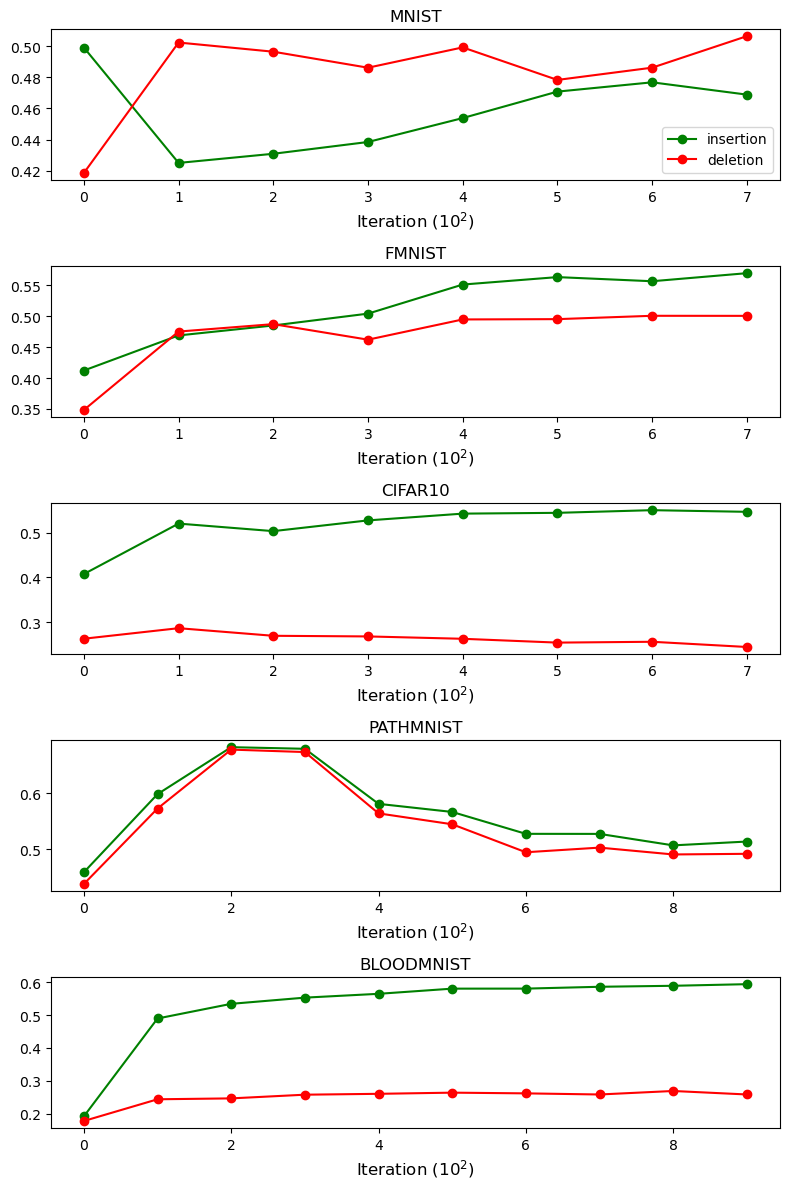

In [17]:
fig, axes = plt.subplots(5, 1, figsize=(8, 12))

for ax, dataset in enumerate(datasets):
    axes[ax].plot(dataset['ins_mean'], 'go-', label='insertion')
    axes[ax].plot(dataset['del_mean'], 'ro-', label='deletion')
    
axes[0].legend()
axes[0].set_title("MNIST")
axes[1].set_title("FMNIST")
axes[2].set_title("CIFAR10")
axes[3].set_title("PATHMNIST")
axes[4].set_title("BLOODMNIST")
for i in range(5):
    axes[i].set_xlabel(f"Iteration ($10^2$)", fontsize=12)
fig.tight_layout()